# Importimg Liabraries

In [3]:
#import requried Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [4]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reading Data from CSV file

In [77]:
data=pd.read_csv("C:\\Users\\badri\\Desktop\\Shravani\\Business Analyst\\Projects\\Diabeties\\diabetes.csv")
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [7]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [78]:
#total no.of columns in the dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [79]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#to know more about the dataset
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
data.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

<Axes: >

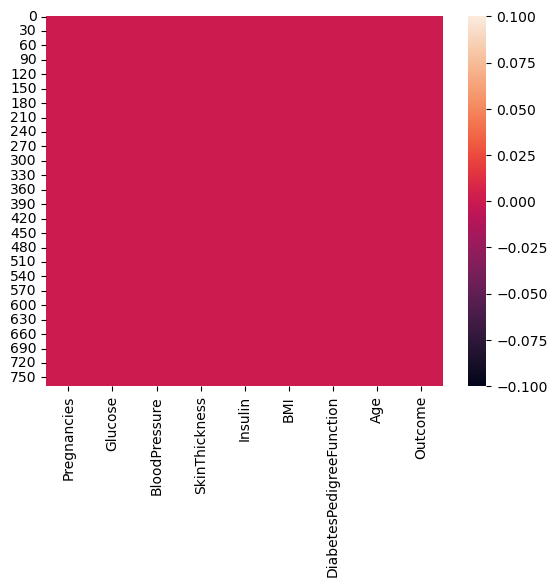

In [12]:
sns.heatmap(data.isnull())

In [30]:
#checking for the total null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [93]:
#no use
data_copy=data.copy
data_copy=data.copy(deep=True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

In [94]:
print(data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Zero Values that Don't Make Sense

In [17]:
##get data where non of column has 0 value (except the first and last columns)
data=data[-(data[data.columns[1:-1]]==0).any(axis=1)]
data.shape

(392, 9)

In [18]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                       2.288   33        1  
6                       0.248   26        1  
8                       0.158   53        1  
13                      0.398   59        1  
..                        ...  ...      ...  
753                     0.222   26        1  
755                     1.057   37        1  
760                     0.766   22        0  
763                     0.171   63        0  
765                     0.245   30        0  

[392 rows x 9 columns]

### Some Summary Information

### Copy to display borders

In [88]:
%%HTML
<style type='text/css'>
table.dataframe td,table.dataframe th{
    border: 1px black solid !important;
    color: black !important;
}
</style>

In [89]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [27]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   392.000000  392.000000     392.000000     392.000000  392.000000   
mean      3.301020  122.627551      70.663265      29.145408  156.056122   
std       3.211424   30.860781      12.496092      10.516424  118.841690   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      21.000000   76.750000   
50%       2.000000  119.000000      70.000000      29.000000  125.500000   
75%       5.000000  143.000000      78.000000      37.000000  190.000000   
max      17.000000  198.000000     110.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  392.000000                392.000000  392.000000  392.000000  
mean    33.086224                  0.523046   30.864796    0.331633  
std      7.027659                  0.345488   10.200777    0.471401  
min     18.200000                  0.085000   21.000000    0.000000  
25%     28.400000                  0.269750   23.000000    0.000000  
50%     33.200000                  0.449500   27.000000    0.000000  
75%     37.100000                  0.687000   36.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [85]:
##check the mean of values depending on their category (i.e. 0 or 1)
data.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [86]:
# the difference between the mean and median is a good indicator of how much skewed your data is!
data.groupby('Outcome').agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000    2.0  109.980000  107.0     68.184000   70.0   
1          4.865672    4.0  141.257463  140.0     70.824627   74.0   

        SkinThickness            Insulin               BMI         \
                 mean median        mean median       mean median   
Outcome                                                             
0           19.664000   21.0   68.792000   39.0  30.304200  30.05   
1           22.164179   27.0  100.335821    0.0  35.142537  34.25   

        DiabetesPedigreeFunction               Age         
                            mean median       mean median  
Outcome                                                    
0                       0.429734  0.336  31.190000   27.0  
1                       0.550500  0.449  37.067164   36.0

# Data Visualization

#### Histogram Plots

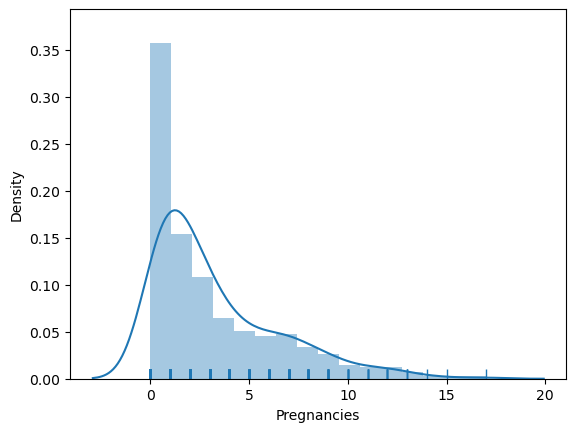

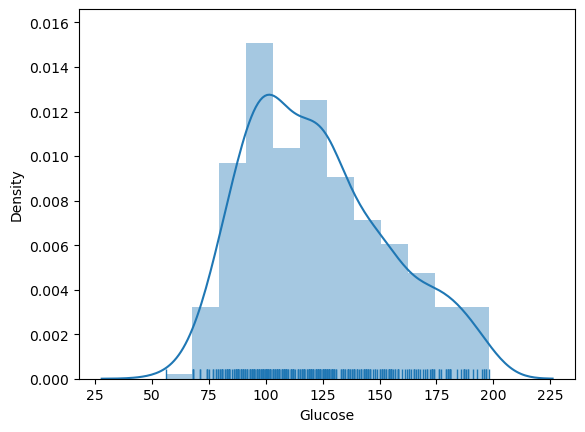

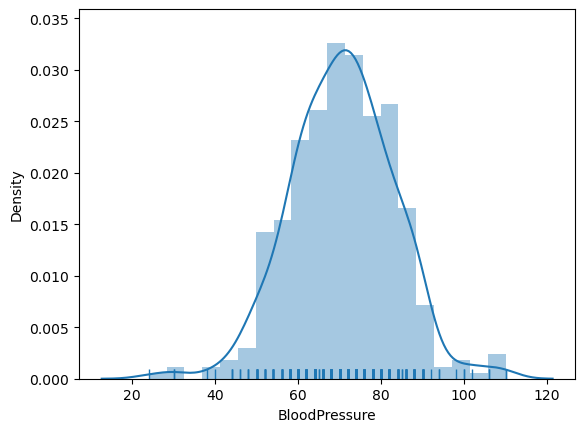

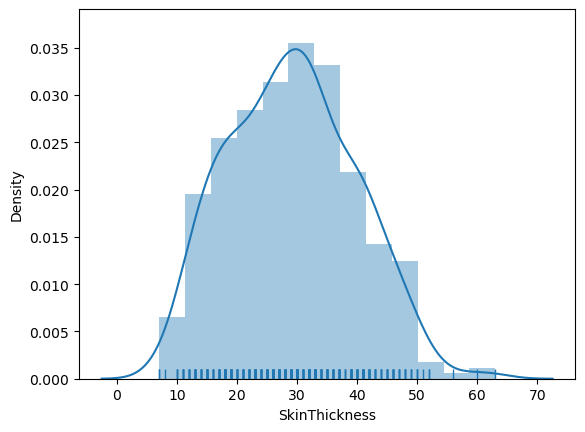

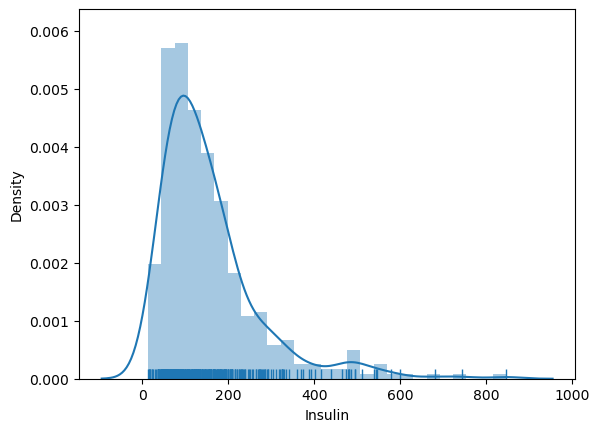

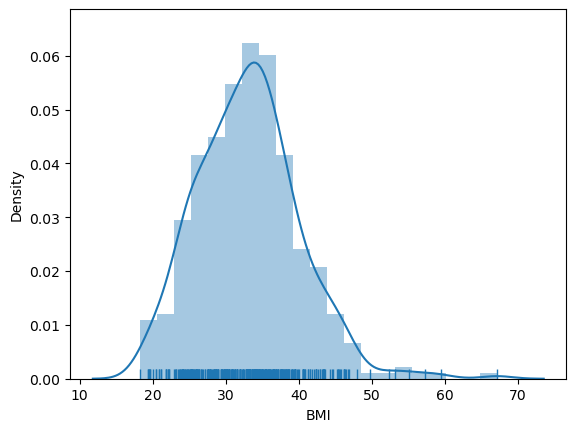

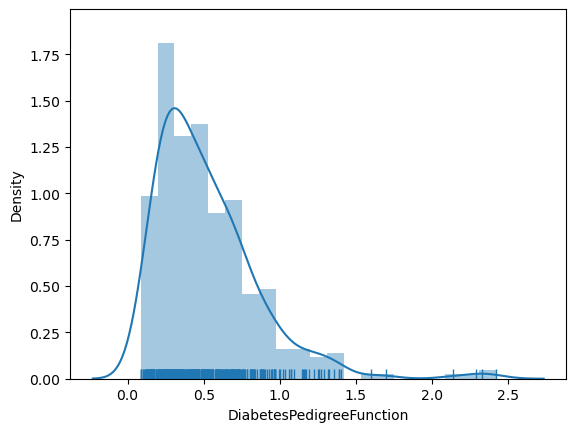

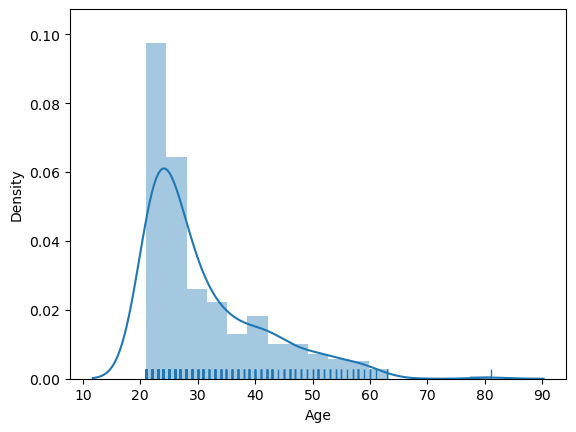

In [34]:
for i,col in enumerate(data.columns[:-1]):
    plt.figure(i)
    sns.distplot(data[col],rug=True);

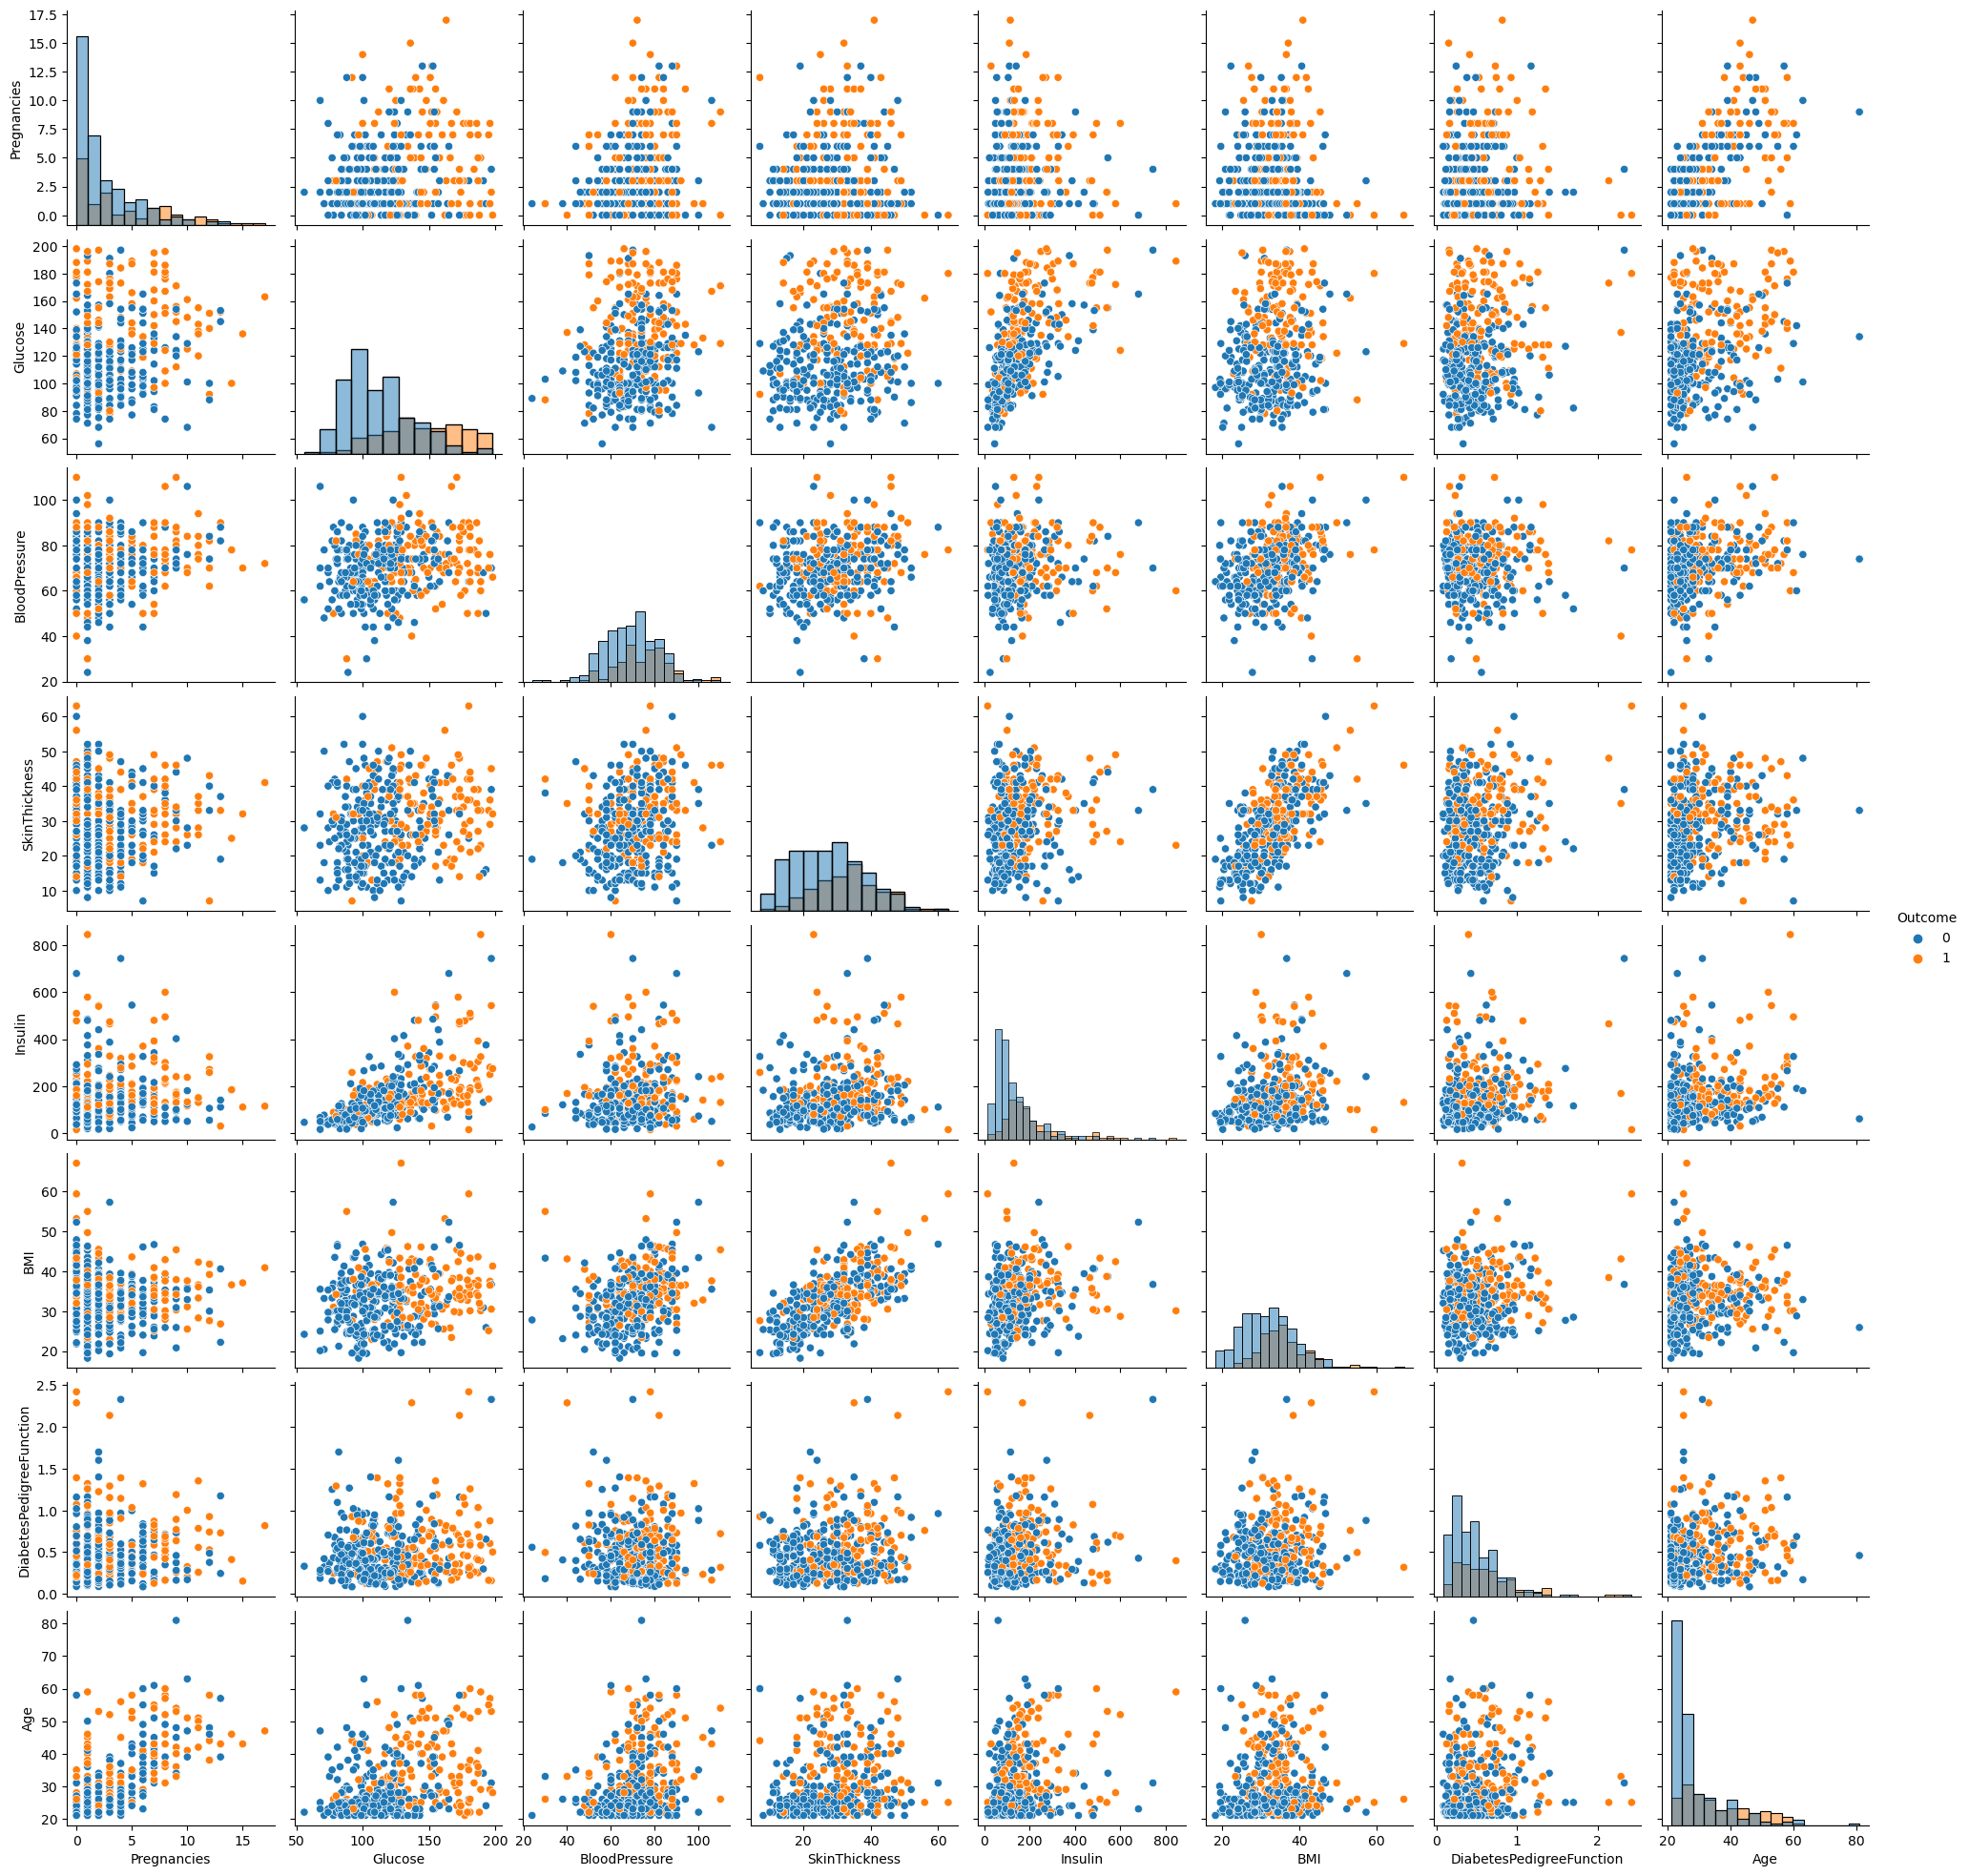

In [39]:
sns.pairplot(data, hue='Outcome', diag_kind = 'hist');

In [40]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.198291       0.213355       0.093209   
Glucose                      0.198291  1.000000       0.210027       0.198856   
BloodPressure                0.213355  0.210027       1.000000       0.232571   
SkinThickness                0.093209  0.198856       0.232571       1.000000   
Insulin                      0.078984  0.581223       0.098512       0.182199   
BMI                         -0.025347  0.209516       0.304403       0.664355   
DiabetesPedigreeFunction     0.007562  0.140180      -0.015971       0.160499   
Age                          0.679608  0.343641       0.300039       0.167761   
Outcome                      0.256566  0.515703       0.192673       0.255936   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.078984 -0.025347                  0.007562   
Glucose                   0.581223  0.209516                  0.140180   
BloodPressure             0.098512  0.304403                 -0.015971   
SkinThickness             0.182199  0.664355                  0.160499   
Insulin                   1.000000  0.226397                  0.135906   
BMI                       0.226397  1.000000                  0.158771   
DiabetesPedigreeFunction  0.135906  0.158771                  1.000000   
Age                       0.217082  0.069814                  0.085029   
Outcome                   0.301429  0.270118                  0.209330   

                               Age   Outcome  
Pregnancies               0.679608  0.256566  
Glucose                   0.343641  0.515703  
BloodPressure             0.300039  0.192673  
SkinThickness             0.167761  0.255936  
Insulin                   0.217082  0.301429  
BMI                       0.069814  0.270118  
DiabetesPedigreeFunction  0.085029  0.209330  
Age                       1.000000  0.350804  
Outcome                   0.350804  1.000000

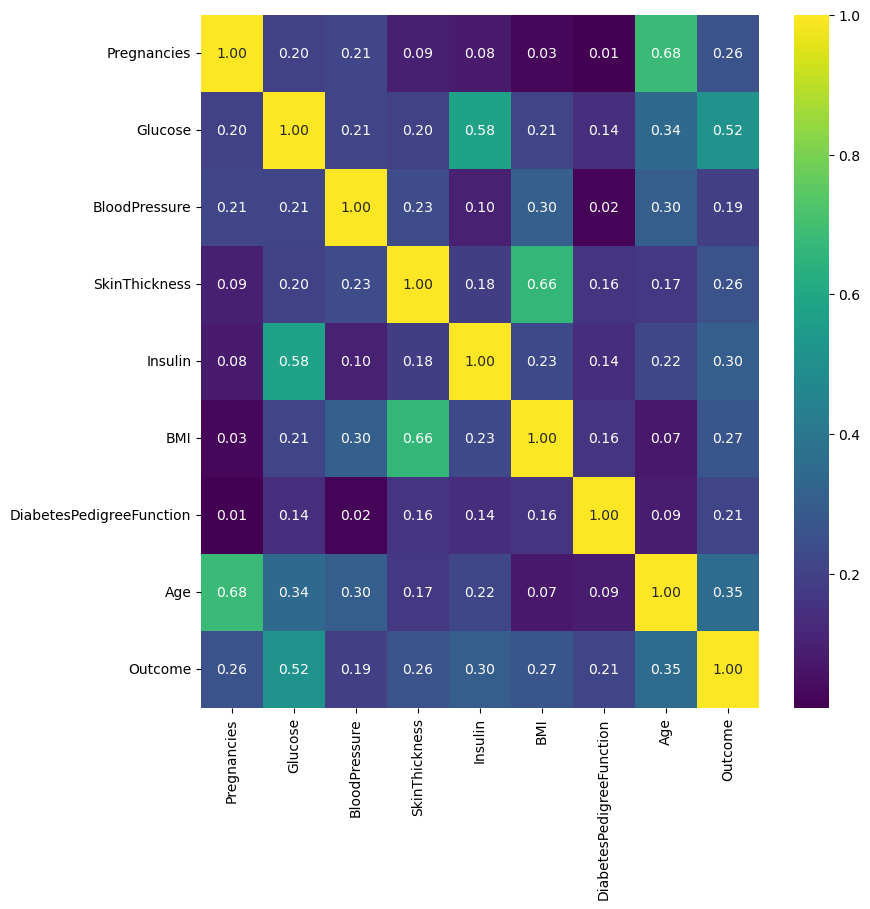

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.corr()),annot=True, cmap='viridis',fmt='0.2f');

# Covariance Plot

In [44]:
data.cov()

Pregnancies      Glucose  BloodPressure  \
Pregnancies                 10.313247    19.652043       8.561981   
Glucose                     19.652043   952.387781      80.994467   
BloodPressure                8.561981    80.994467     156.152304   
SkinThickness                3.147933    64.537672      30.563156   
Insulin                     30.144188  2131.662900     146.295162   
BMI                         -0.572058    45.439613      26.732178   
DiabetesPedigreeFunction     0.008390     1.494605      -0.068951   
Age                         22.263310   108.179694      38.245916   
Outcome                      0.388408     7.502349       1.134976   

                          SkinThickness       Insulin         BMI  \
Pregnancies                    3.147933     30.144188   -0.572058   
Glucose                       64.537672   2131.662900   45.439613   
BloodPressure                 30.563156    146.295162   26.732178   
SkinThickness                110.595171    227.710489   49.099706   
Insulin                      227.710489  14123.347226  189.081594   
BMI                           49.099706    189.081594   49.387994   
DiabetesPedigreeFunction       0.583139      5.580072    0.385492   
Age                           17.996692    263.163618    5.004782   
Outcome                        1.268790     16.886711    0.894861   

                          DiabetesPedigreeFunction         Age    Outcome  
Pregnancies                               0.008390   22.263310   0.388408  
Glucose                                   1.494605  108.179694   7.502349  
BloodPressure                            -0.068951   38.245916   1.134976  
SkinThickness                             0.583139   17.996692   1.268790  
Insulin                                   5.580072  263.163618  16.886711  
BMI                                       0.385492    5.004782   0.894861  
DiabetesPedigreeFunction                  0.119362    0.299664   0.034092  
Age                                       0.299664  104.055842   1.686896  
Outcome                                   0.034092    1.686896   0.222219

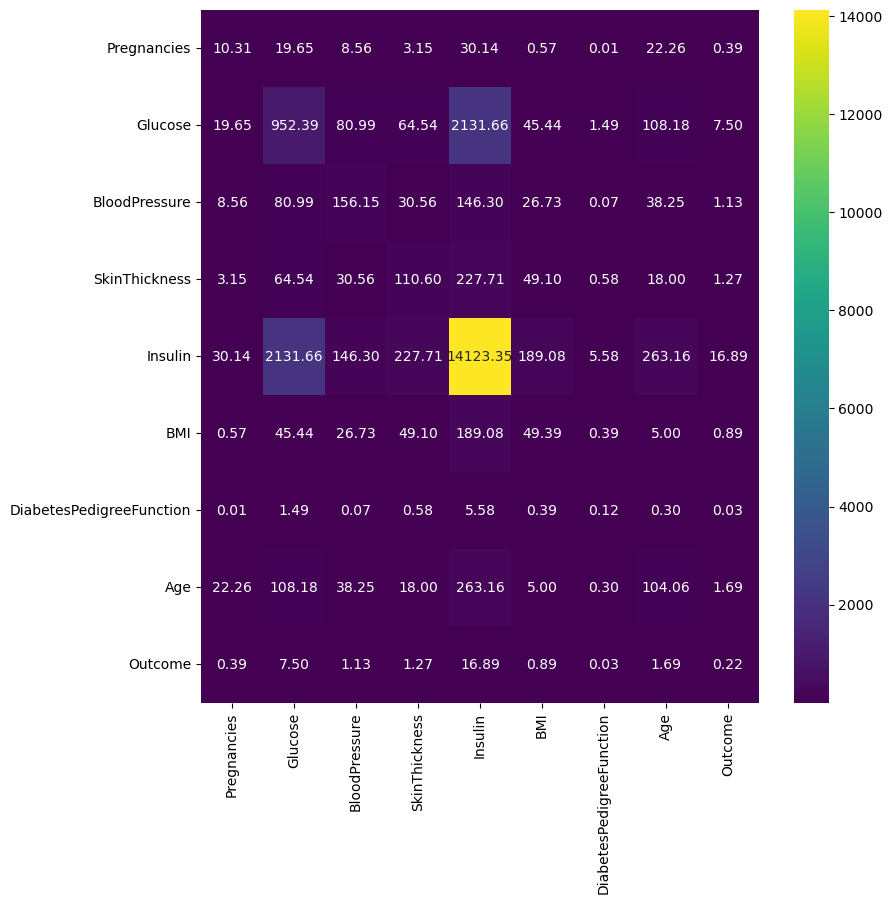

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.cov()),annot=True, cmap='viridis',fmt='0.2f');

### Box plot, violin plots and Bee Swarm Plots 

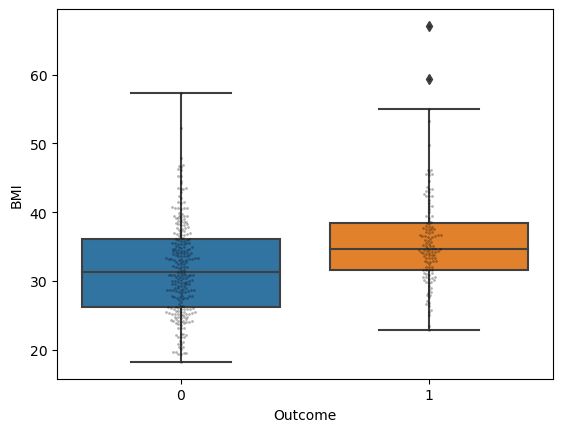

In [48]:
sns.boxplot(x='Outcome',y="BMI", data=data, whis=3.0);
sns.swarmplot(x='Outcome',y="BMI", data=data, size=2, color='k',alpha=0.3);

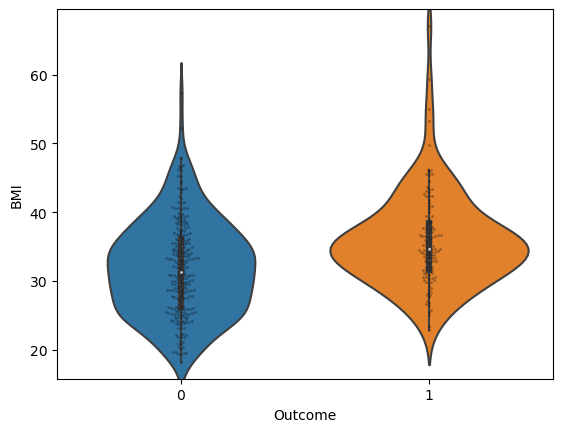

In [51]:
sns.violinplot(x='Outcome',y='BMI',data=data);
sns.swarmplot(x='Outcome', y='BMI',data=data,size=2, color='k' ,alpha=0.3);

### 2D Histograms

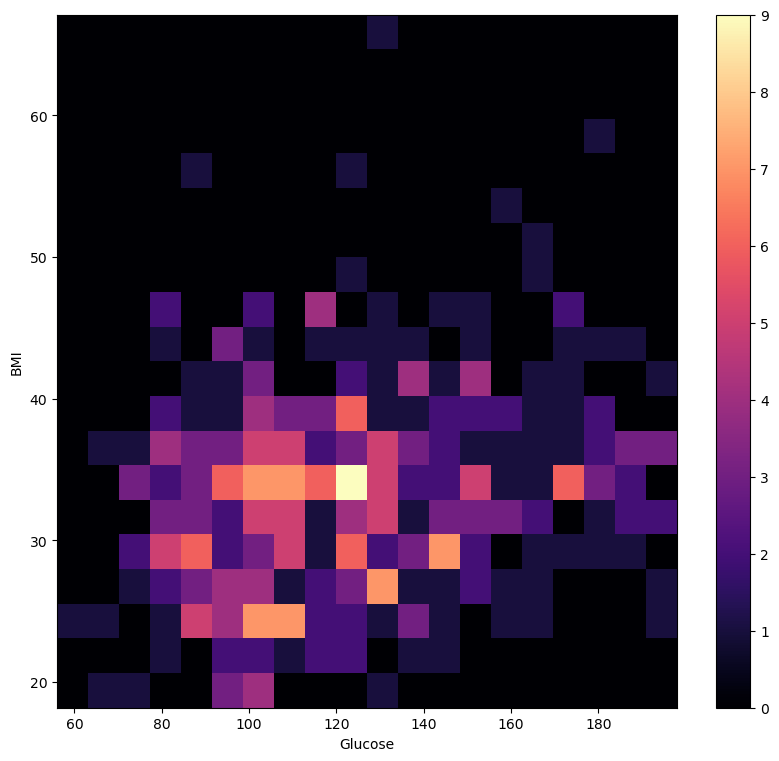

In [52]:
plt.figure(figsize=(10,9))
plt.hist2d(data["Glucose"], data["BMI"],bins=(20,20),cmap='magma')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.colorbar();

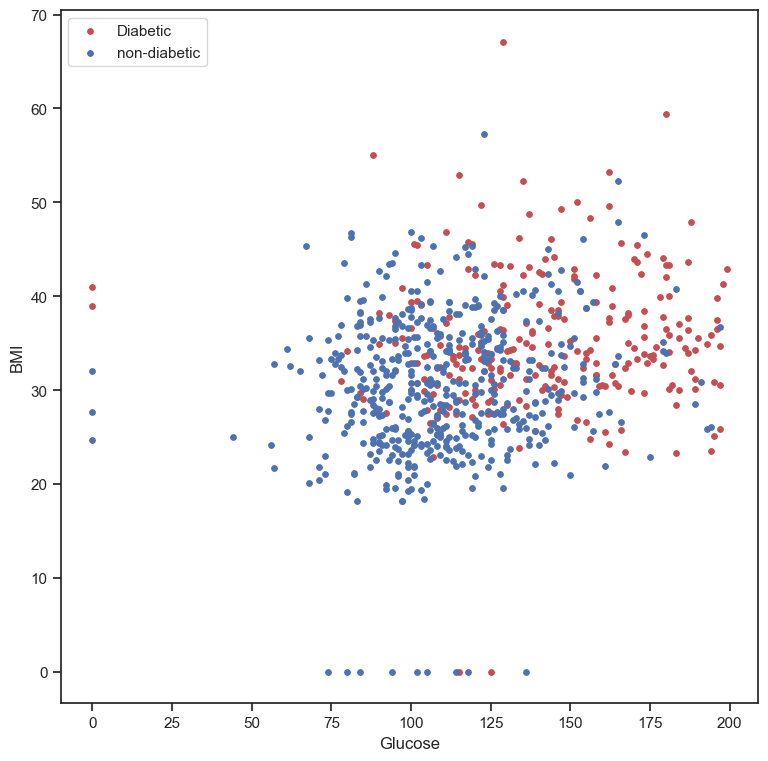

In [84]:
plt.figure(figsize=(9,9))

m=data['Outcome']==1
plt.scatter(data.loc[m,'Glucose'],data.loc[m,'BMI'],c='r', s=15, label='Diabetic')
plt.scatter(data.loc[-m, 'Glucose'],data.loc[-m,'BMI'],c='b',s=15,label='non-diabetic')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(loc=2);

# Probabilistics Analysis

In [56]:
##get these columns only
data= data[['Glucose','BMI','Age','Outcome']]

In [58]:
data.shape

(392, 4)

In [81]:
##Split data into 2 dataframe(subdatasets),one for Diabetics and the other for non Diabetic
data_yes = data.loc[data['Outcome']==1,['Glucose','BMI','Age']]
data_No = data.loc[data['Outcome']==0,['Glucose','BMI','Age']]

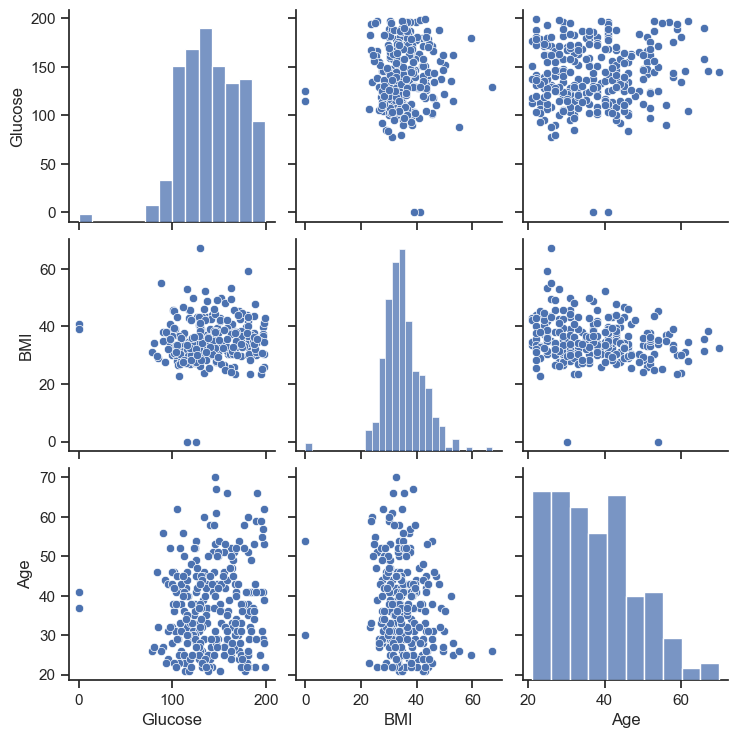

In [82]:
##scatter matrix for the Diabetics subdataset
sns.set(style='ticks')
sns.pairplot(data_yes,diag_kind='hist');

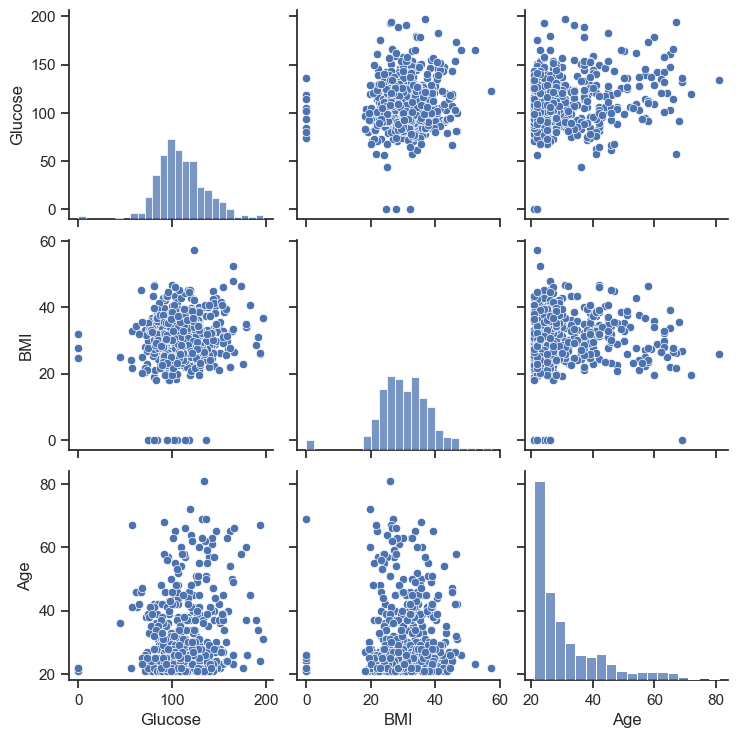

In [83]:
##Scatter matrix for the non diabetics subdataset
sns.set(style='ticks')
sns.pairplot(data_No,diag_kind='hist');

Outcome
0    500
1    268
Name: count, dtype: int64


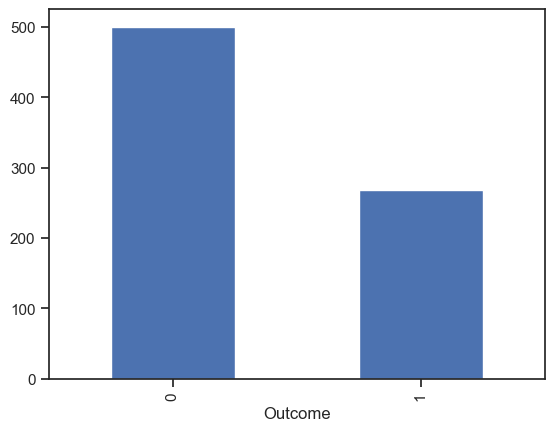

In [80]:
#checking the balance of the data by ploting the count of outcomes by their value
color_wheel={1:"#0392cf", 2:"#7bc043"}
colors= data['Outcome'].map(lambda x:color_wheel.get(x+1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")

The above graph shows that the data is biased towards datapoints having oytcome value as 0 where it means that daibetes was not prsent actually. The number of non-diabetic is almost twice of diabetics patients.

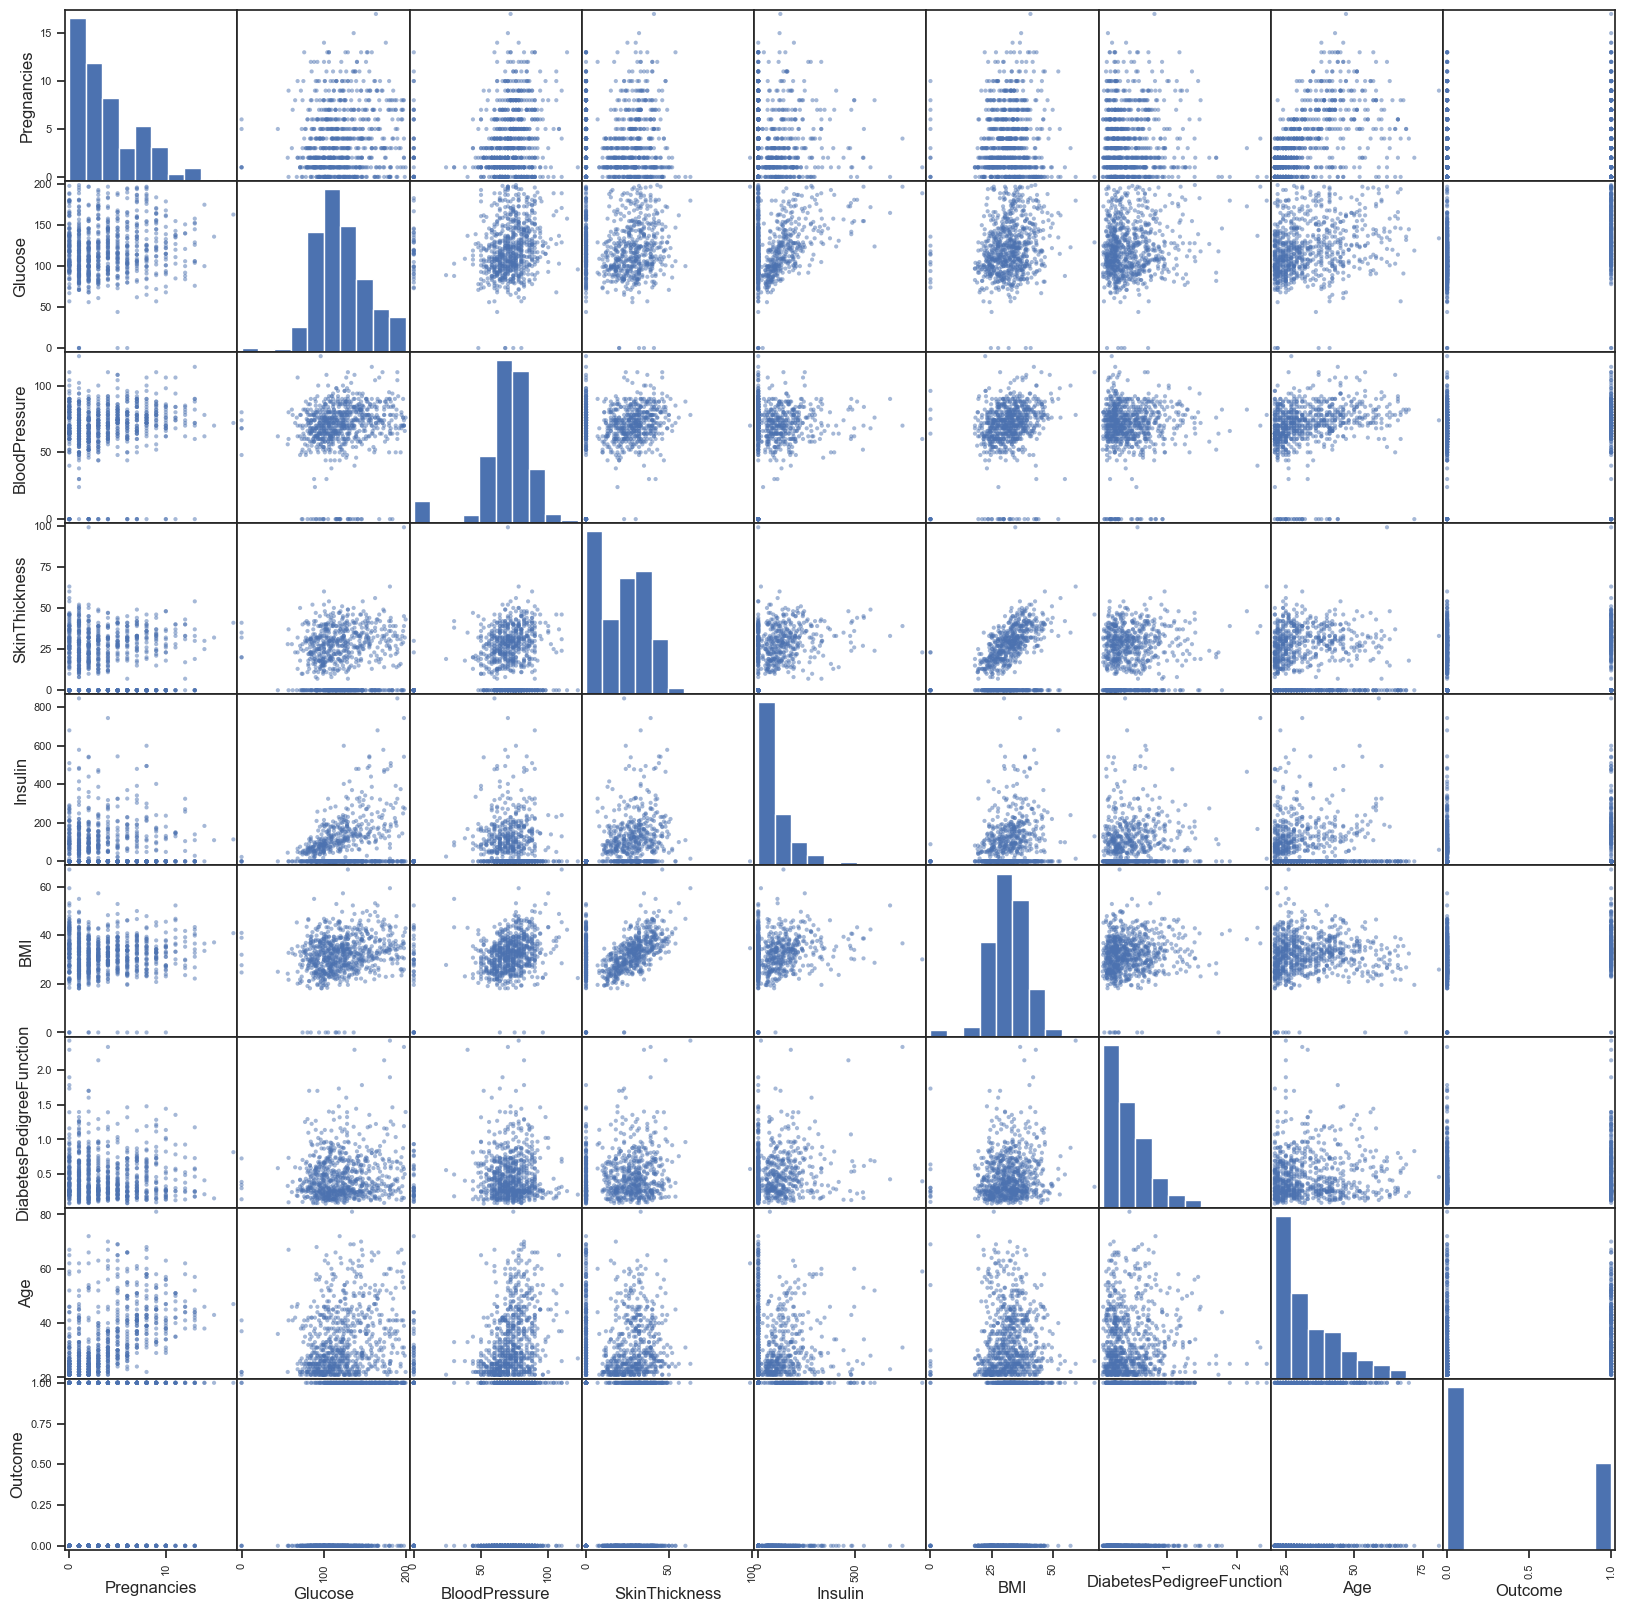

In [92]:
#plot scatter matrix of uncleaned data
p=scatter_matrix(data,figsize=(20,20))

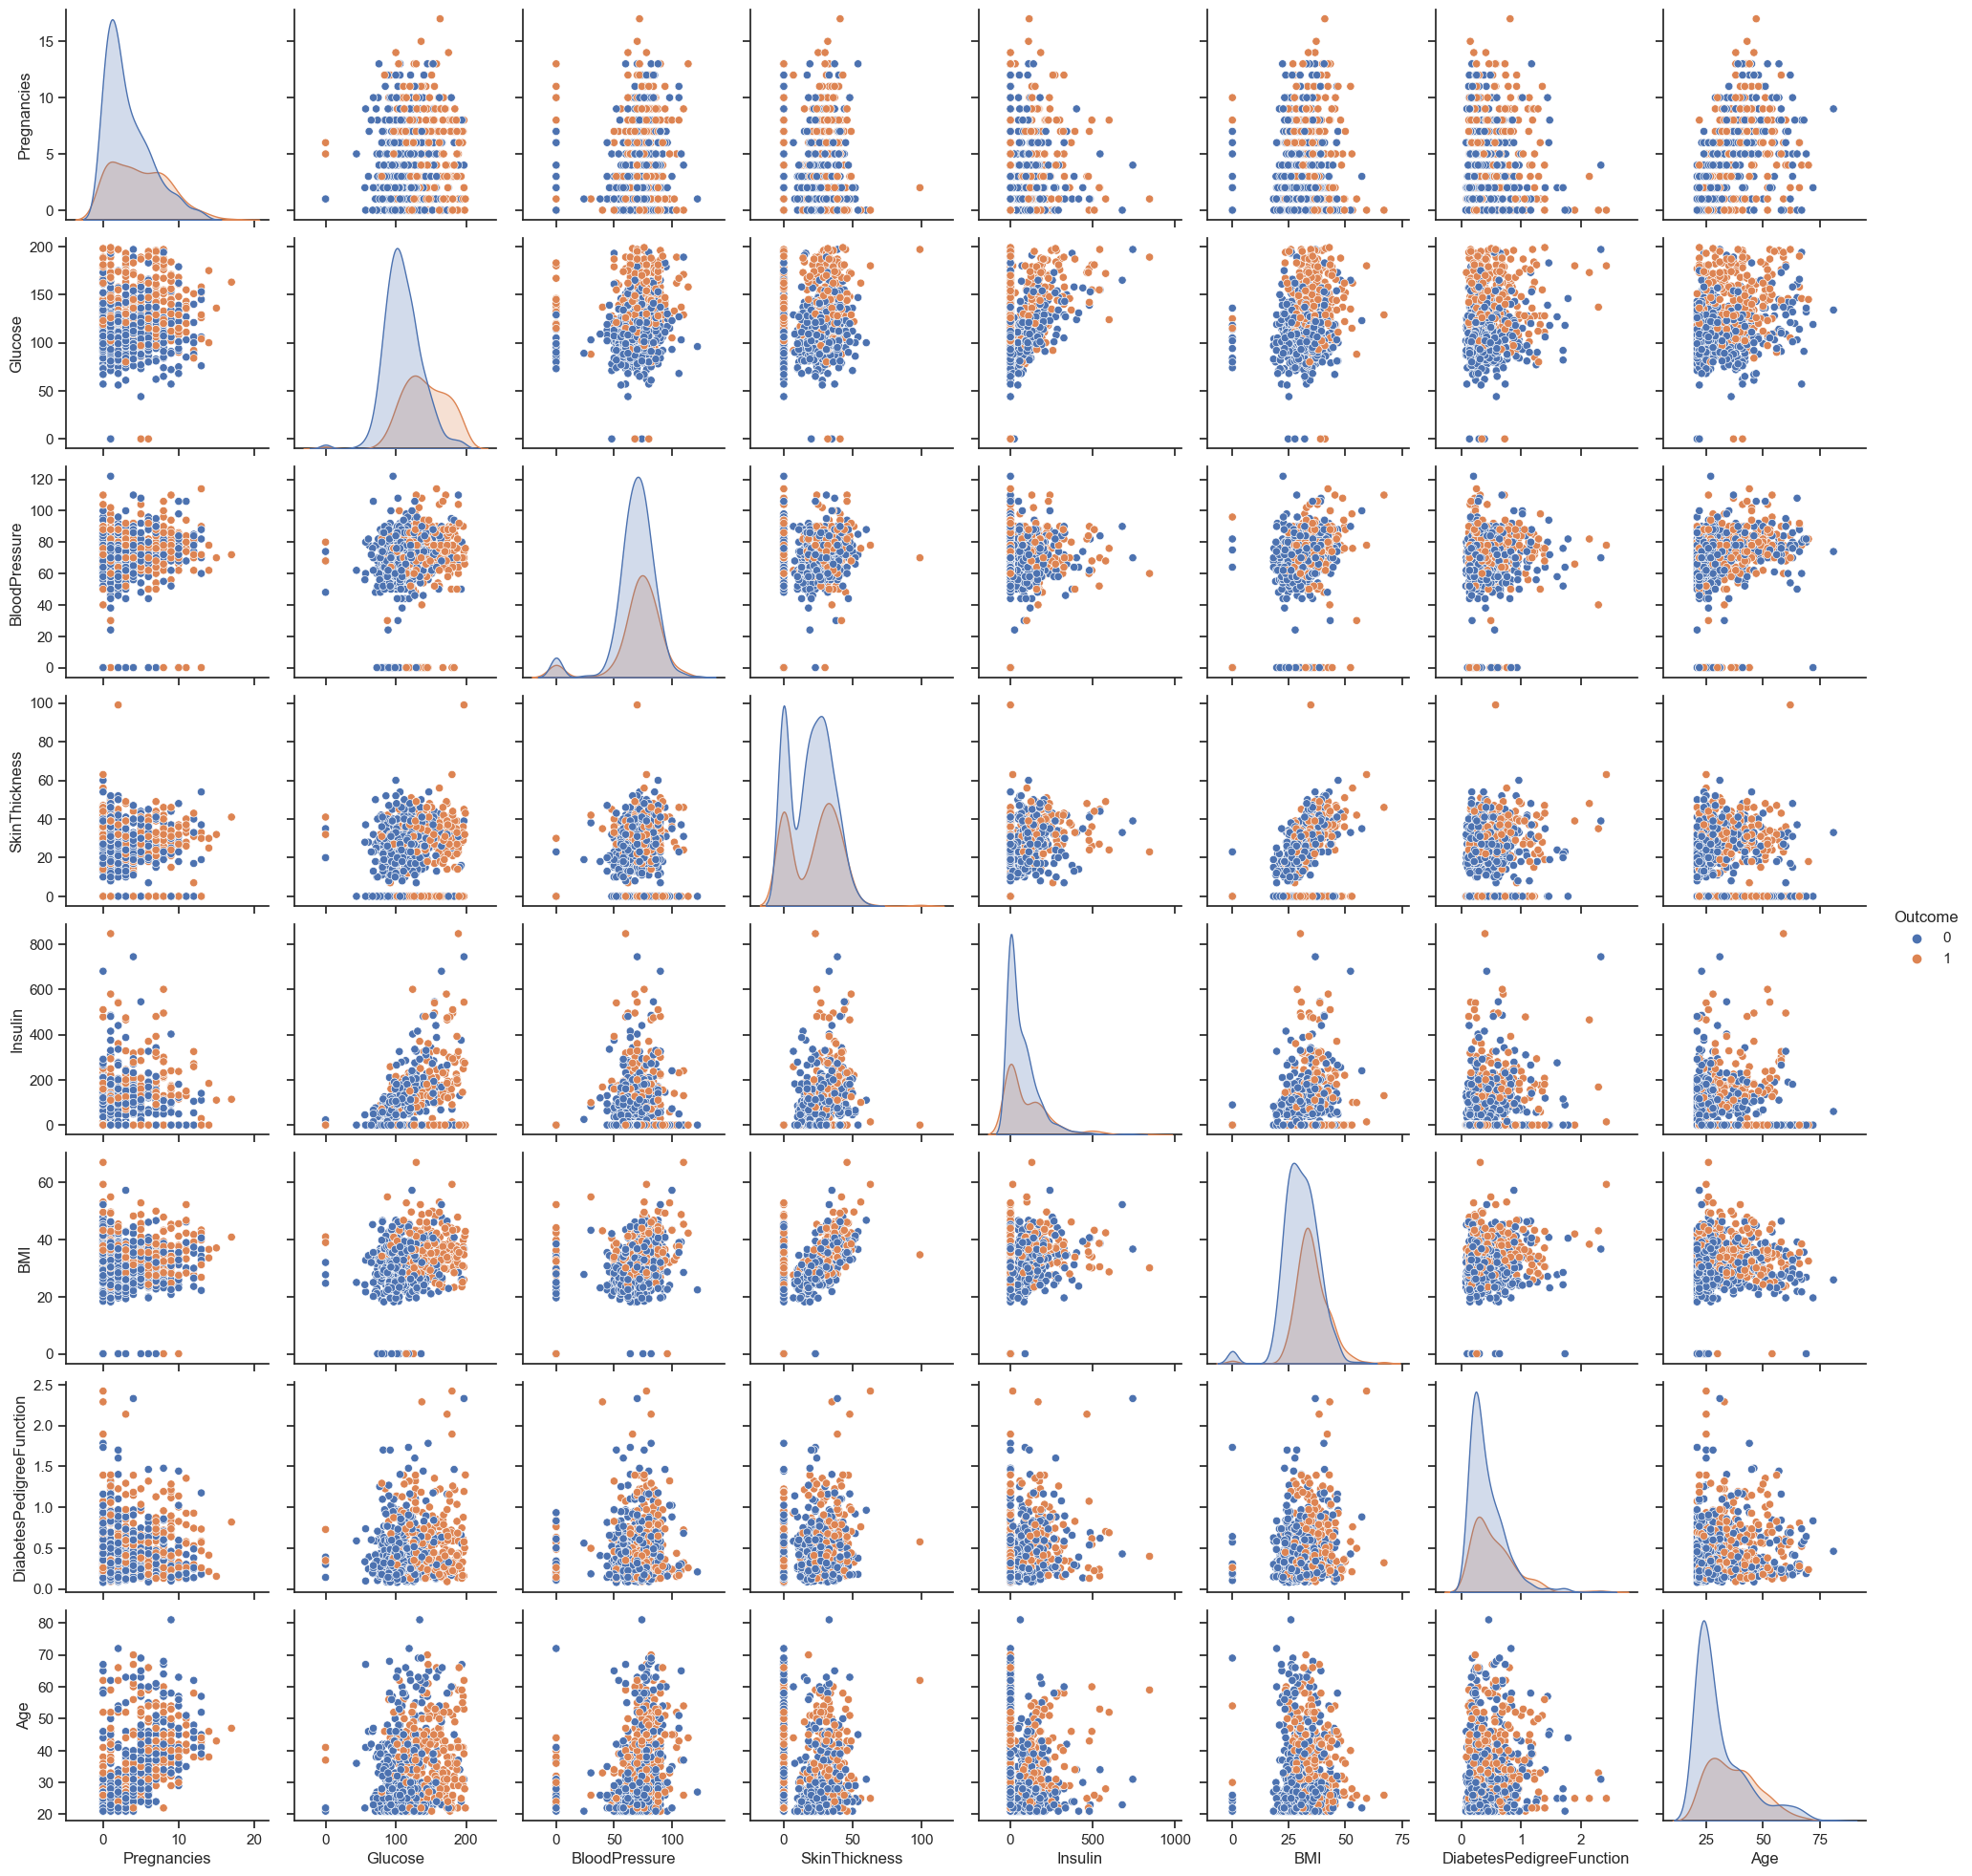

In [96]:
#plotting pair plots for the data
sns.pairplot(data ,hue='Outcome')
plt.show()

High Glucose level in pregnancy more likely. A combination of high glucose level and a BMI above 30 boostss the risk of diabetes.

<Axes: ylabel='count'>

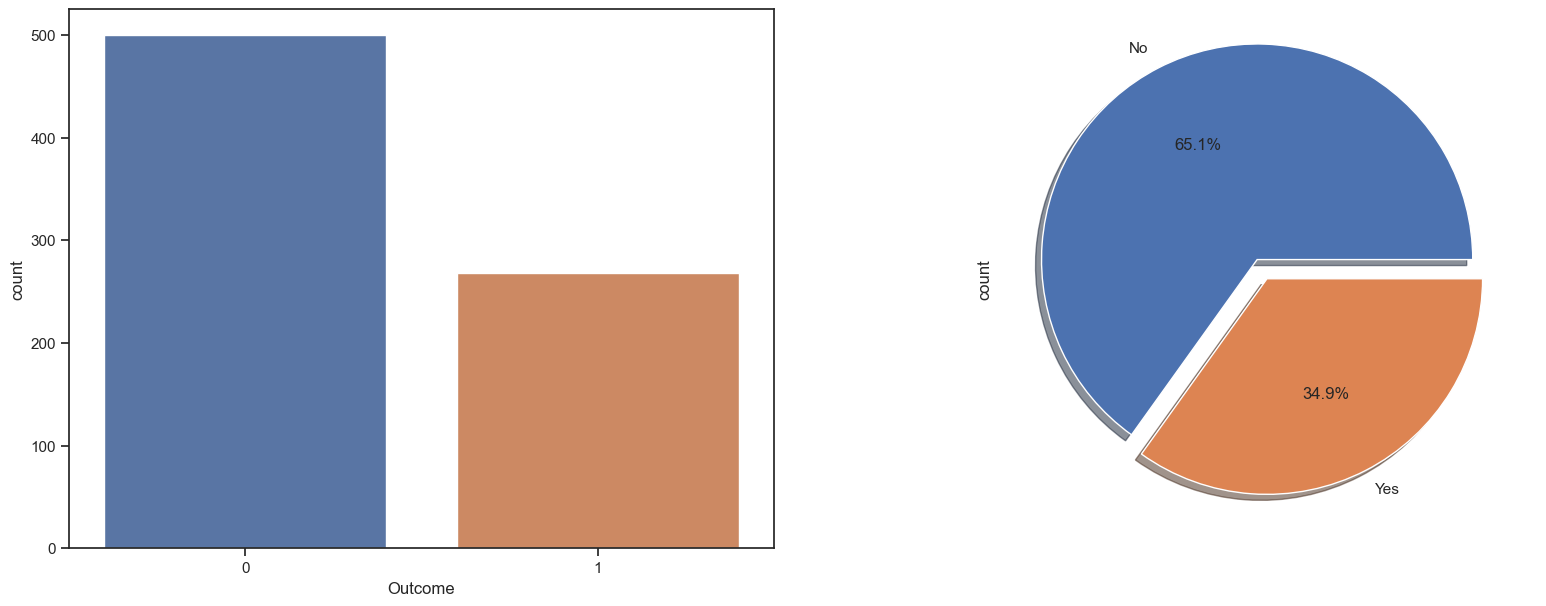

In [97]:
fig, ax=plt.subplots(1,2, figsize=(20,7))

sns.countplot(data=data, x='Outcome', ax = ax[0])
data["Outcome"].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%', labels=['No','Yes'],shadow=True,ax=ax[1])

We observe from the above plot that:

65.1% patients in the datsets do NOT have Diabetes.

34.9% patients in the dataset has diabetes

# Conclusion:

In [ ]:
1. It has a desent level of precision, indicating that when it predicts positive cases(diabetic).
It's correct about 65% of the time.

2. Out of the 768 patients, 268 have been diagnosed with diabetes.

3. Patients with high boold pressure has greater chances of diabetes.

4. An increase in boold pressure BMI and skin thickness also increases

5. Increasing level of glucose and insulin increases chances of diabetes.